In [19]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("heart.csv")
%matplotlib inline



In [20]:
# Encode categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes
#This loop converts categorical columns into numeric codes using pandas' astype('category').cat.codes. Each unique category is assigned a numeric value.


In [21]:
# Replace unrealistic values (0) in 'Cholesterol' and 'RestingBP' with NaN
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)
data['RestingBP'] = data['RestingBP'].replace(0, np.nan)
#Values of 0 in Cholesterol and RestingBP are considered unrealistic. These are replaced with NaN to handle them appropriately later.


In [22]:
# Fill missing values with the median
data['Cholesterol'] = data['Cholesterol'].fillna(data['Cholesterol'].median())
data['RestingBP'] = data['RestingBP'].fillna(data['RestingBP'].median())
#Missing values (NaN) are filled with the median of the respective column to avoid skewing the data distribution.

In [23]:
# Normalize numerical features
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_columns:
    data[col] = (data[col] - data[col].mean()) / data[col].std()


In [24]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG']

print("Frequency Distribution Tables:\n")

# Categorical Variables
for col in categorical_columns:
    freq_table = data[col].value_counts()
    print(f"Frequency Distribution for {col}:\n")
    print(freq_table.to_string(index=True), "\n")


Frequency Distribution Tables:

Frequency Distribution for Sex:

Sex
1    725
0    193 

Frequency Distribution for ChestPainType:

ChestPainType
0    496
2    203
1    173
3     46 

Frequency Distribution for RestingECG:

RestingECG
1    552
0    188
2    178 



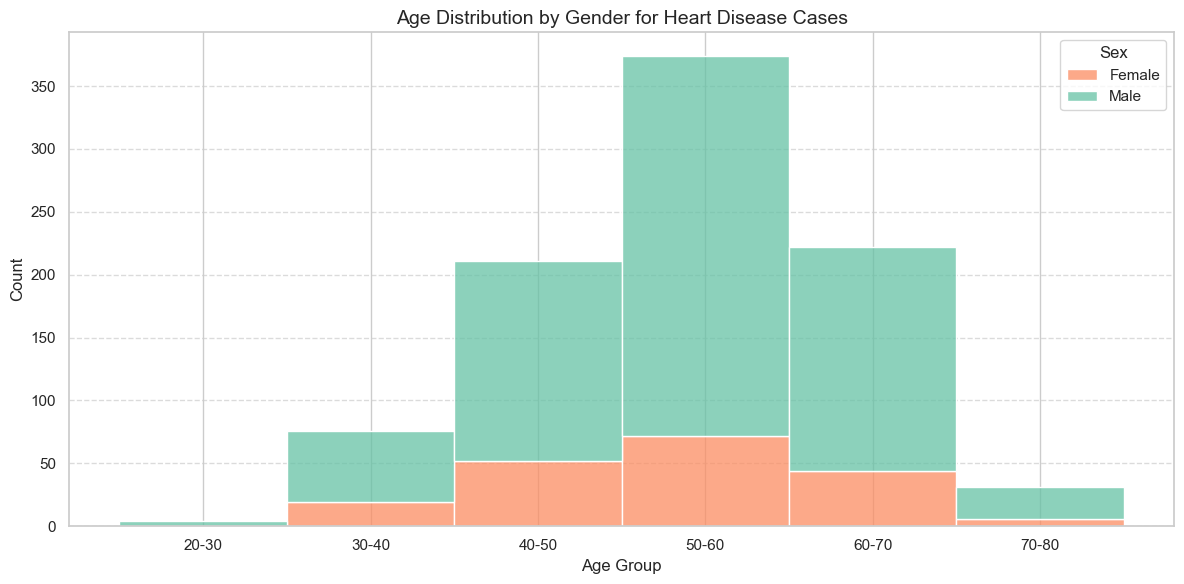

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('heart.csv')

# Set up the plotting environment
sns.set(style="whitegrid")

# Define age bins for better x-axis labels
bins = [20, 30, 40, 50, 60, 70, 80]  # Adjust based on the age range in your dataset
labels = ["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data,
    x="AgeGroup",
    hue="Sex",
    multiple="stack",
    kde=False,
    palette="Set2"
)

# Add title and labels
plt.title("Age Distribution by Gender for Heart Disease Cases", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sex", labels=["Female", "Male"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show or save the plot
try:
    plt.show()  # Attempt to show the plot in an interactive environment
except:
    plot_filename = "age_distribution_plot.png"
    plt.savefig(plot_filename, dpi=300)  # Save to a file in case of non-interactive environment
    print(f"Plot saved as {plot_filename}")



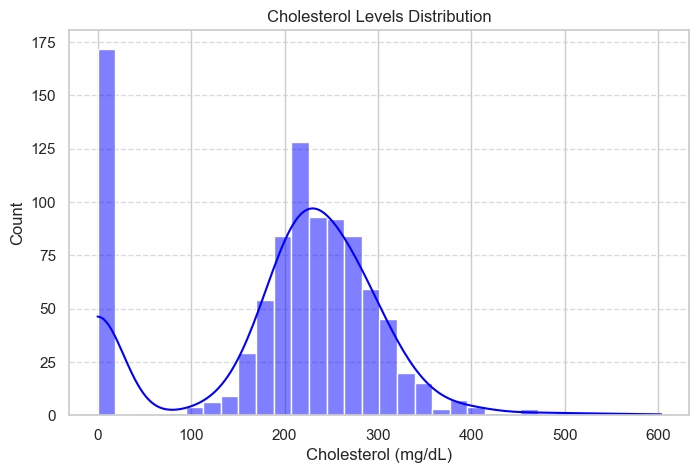

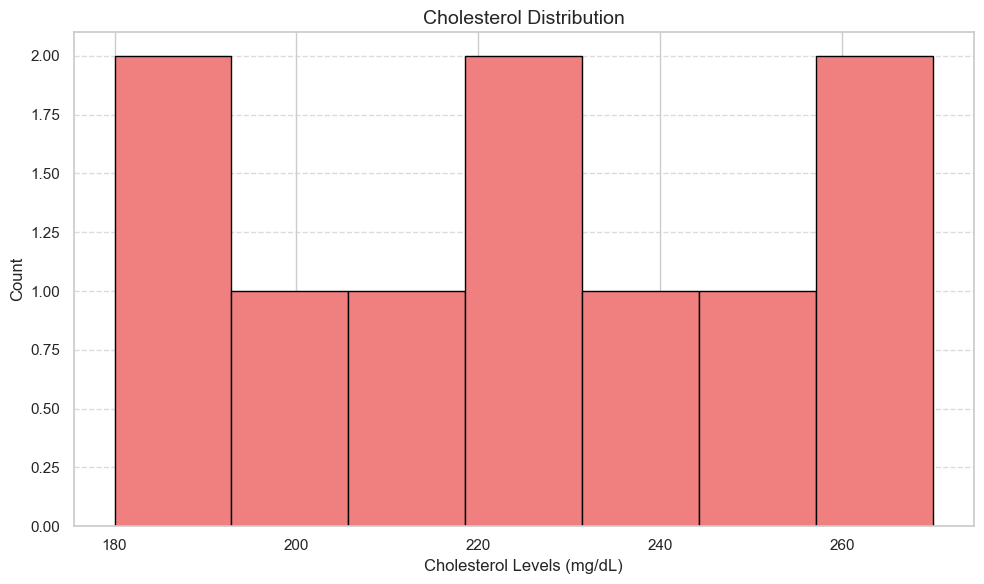

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="Cholesterol", kde=True, color="blue")
plt.title("Cholesterol Levels Distribution")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame for demonstration
# Replace this with your actual data loading code
data = {'chol': [200, 220, 240, 180, 190, 250, 230, 210, 260, 270]}
df = pd.DataFrame(data)

# Validate the 'chol' column
if 'chol' in df.columns:
    # Ensure the data is numeric
    df['chol'] = pd.to_numeric(df['chol'], errors='coerce')
    
    # Drop rows with missing values in 'chol'
    if not df['chol'].isnull().all():  # Check if there are valid data points
        plt.figure(figsize=(10, 6))
        
        # Plot the histogram
        plt.hist(df['chol'], bins=7, edgecolor='black', color='lightcoral')
        plt.title('Cholesterol Distribution', fontsize=14)
        plt.xlabel('Cholesterol Levels (mg/dL)', fontsize=12)
        plt.ylabel('Count', fontsize=12)  # Corrected y-axis label
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("The 'chol' column is empty or contains only invalid data.")
else:
    print("'chol' column not found in the DataFrame.")


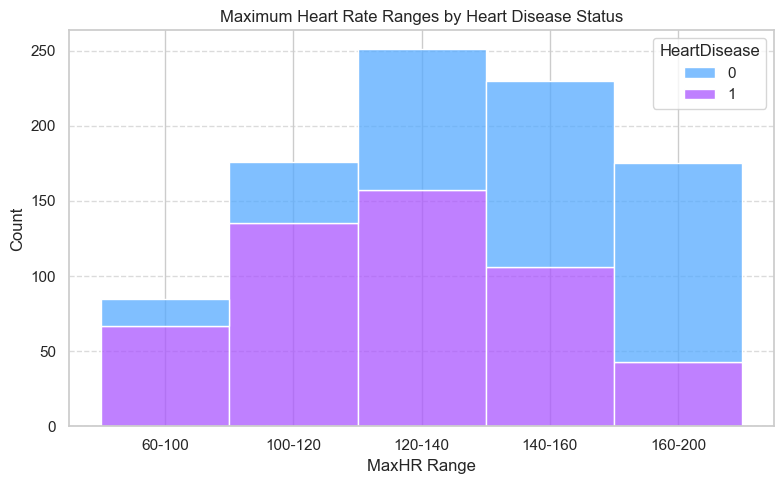

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define bins for MaxHR
bins = [60, 100, 120, 140, 160, 200]
labels = ["60-100", "100-120", "120-140", "140-160", "160-200"]

# Create a new column for MaxHR ranges
data['MaxHR_Range'] = pd.cut(data['MaxHR'], bins=bins, labels=labels, include_lowest=True)

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="MaxHR_Range", hue="HeartDisease", multiple="stack", palette="cool")
plt.title("Maximum Heart Rate Ranges by Heart Disease Status")
plt.xlabel("MaxHR Range")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


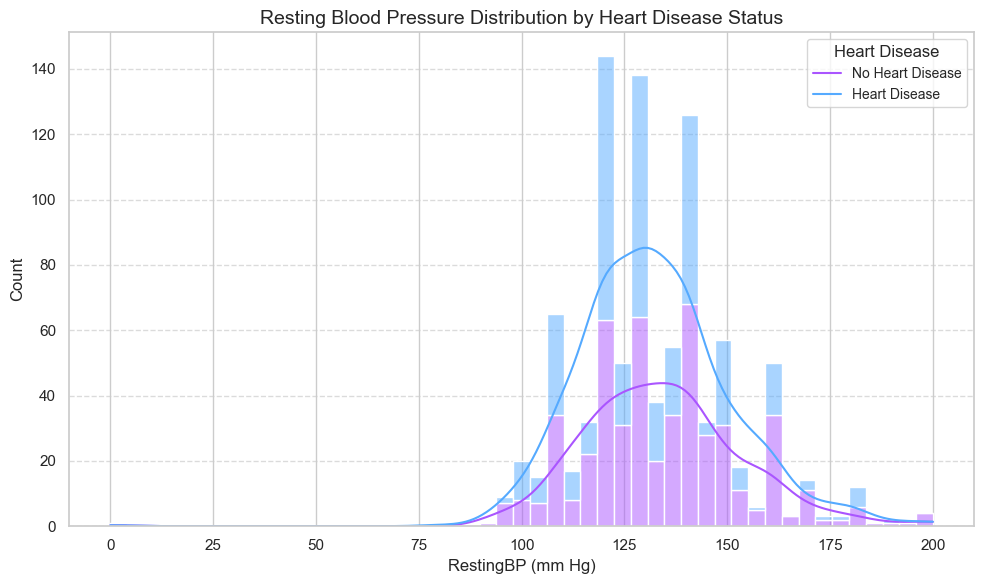

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'RestingBP' to numeric, coercing errors to NaN
data["RestingBP"] = pd.to_numeric(data["RestingBP"], errors="coerce")

# Drop rows with NaN values in 'RestingBP'
data = data.dropna(subset=["RestingBP"])

# Plot the distribution with segmentation by heart disease status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="RestingBP", hue="HeartDisease", kde=True, palette="cool", multiple="stack")

# Add titles and labels
plt.title("Resting Blood Pressure Distribution by Heart Disease Status", fontsize=14)
plt.xlabel("RestingBP (mm Hg)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Heart Disease", labels=["No Heart Disease", "Heart Disease"], fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


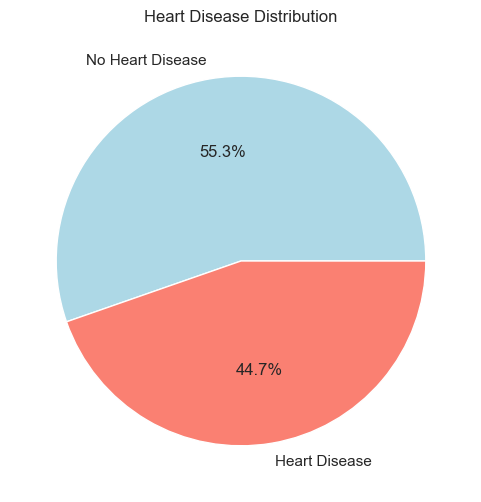

C:\Users\sukku\AppData\Local\Temp\ipykernel_65036\4193631492.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="HeartDisease", palette="cool")


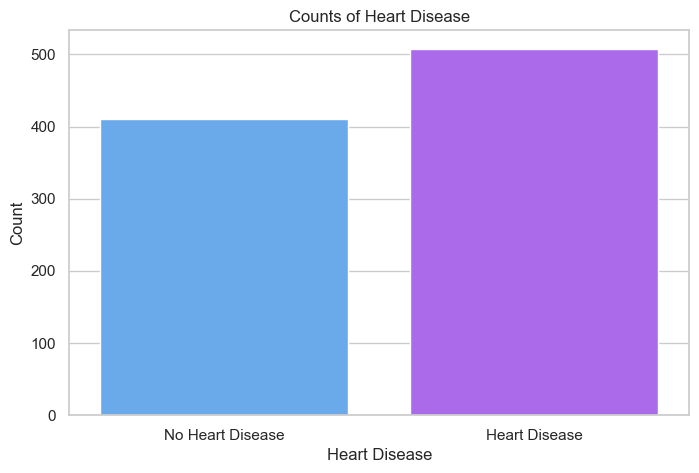

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame 'data' is already defined
# data = pd.read_csv('your_data.csv')  # If loading from a CSV

# Set the plot style
sns.set(style="whitegrid")

# 1. Pie Chart for Heart Disease Distribution
plt.figure(figsize=(6, 6))
heart_disease_counts = data['HeartDisease'].value_counts()
plt.pie(heart_disease_counts, labels=["No Heart Disease", "Heart Disease"], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Heart Disease Distribution")
plt.show()

# 2. Bar Chart for Counts of Heart Disease
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="HeartDisease", palette="cool")
plt.title("Counts of Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Heart Disease", "Heart Disease"])
plt.show()


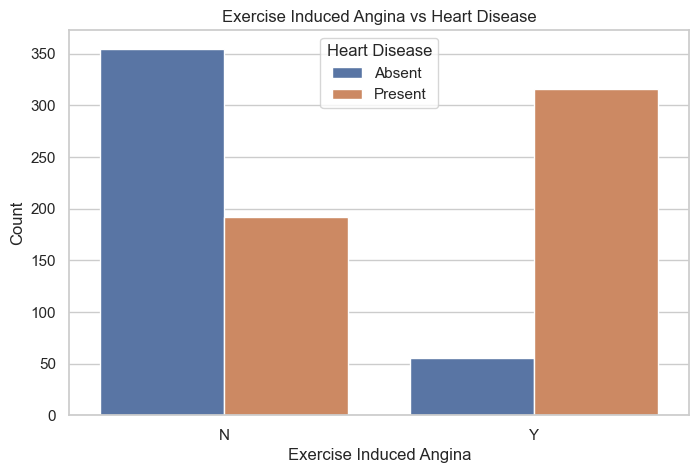

Exercise Induced Angina Yes: 371
Exercise Induced Angina No: 547


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Count the values for Exercise Induced Angina and Heart Disease
yes = df['ExerciseAngina'].value_counts().get('Y', 0)
no = df['ExerciseAngina'].value_counts().get('N', 0)

# Create a countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='ExerciseAngina', data=df, hue='HeartDisease')
plt.title('Exercise Induced Angina vs Heart Disease')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

# Print counts
print('Exercise Induced Angina Yes:', yes)
print('Exercise Induced Angina No:', no)


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


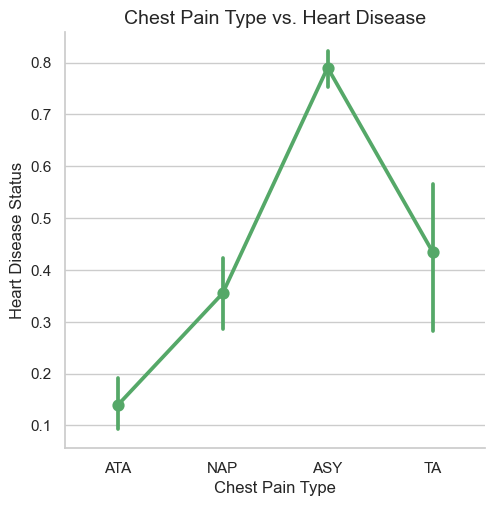

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows to understand the data structure
print(df.head())

# Create the categorical plot
sns.catplot(x='ChestPainType', y='HeartDisease', data=df, kind='point', color='g')

# Set plot labels
plt.title('Chest Pain Type vs. Heart Disease', fontsize=14)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Heart Disease Status', fontsize=12)

# Show the plot
plt.show()


In [39]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


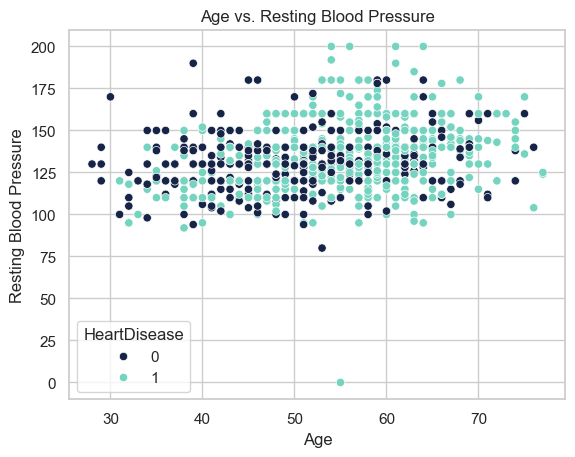

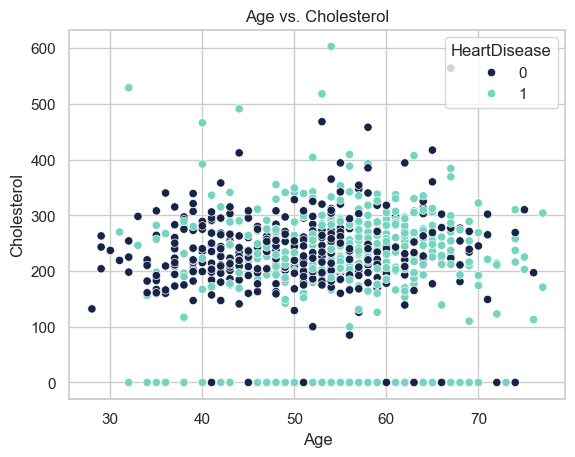

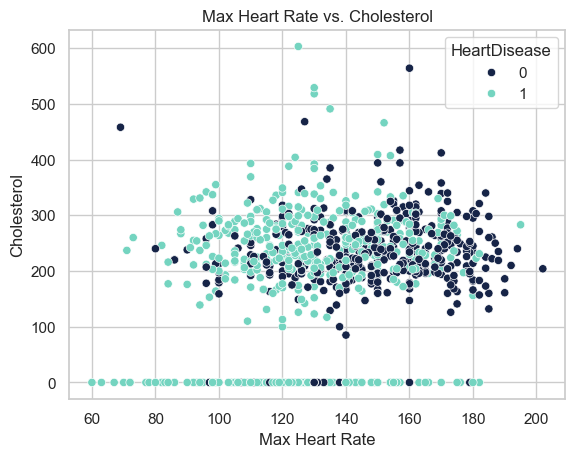

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the column names to verify
print(df.columns)

# Scatter plot 1: Age vs. Resting Blood Pressure
sns.scatterplot(x='Age', y='RestingBP', data=df, hue='HeartDisease', palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

# Scatter plot 2: Age vs. Cholesterol
sns.scatterplot(x='Age', y='Cholesterol', data=df, hue='HeartDisease', palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

# Scatter plot 3: MaxHR vs. Cholesterol
sns.scatterplot(x='MaxHR', y='Cholesterol', data=df, hue='HeartDisease', palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Max Heart Rate vs. Cholesterol')
plt.xlabel('Max Heart Rate')
plt.ylabel('Cholesterol')
plt.show()


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


C:\Users\sukku\AppData\Local\Temp\ipykernel_65036\4156834431.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Age', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))


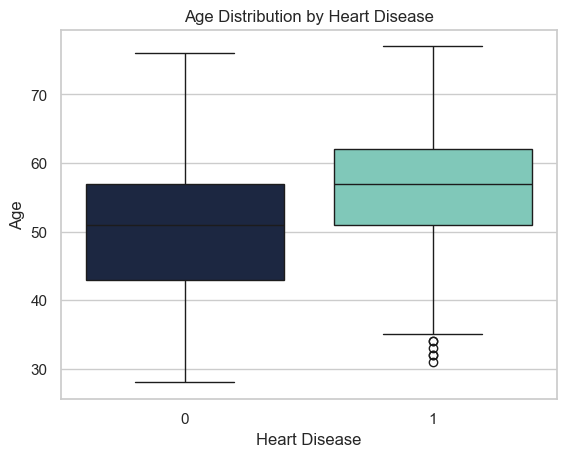

C:\Users\sukku\AppData\Local\Temp\ipykernel_65036\4156834431.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))


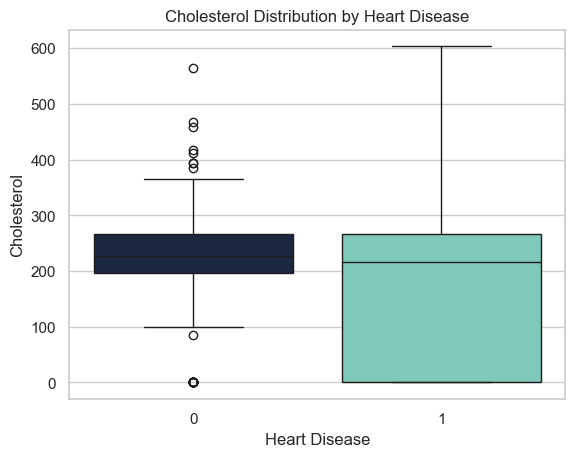

C:\Users\sukku\AppData\Local\Temp\ipykernel_65036\4156834431.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='RestingBP', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))


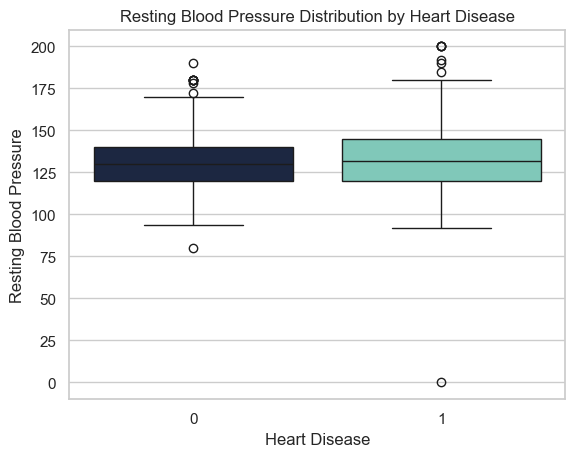

C:\Users\sukku\AppData\Local\Temp\ipykernel_65036\4156834431.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))


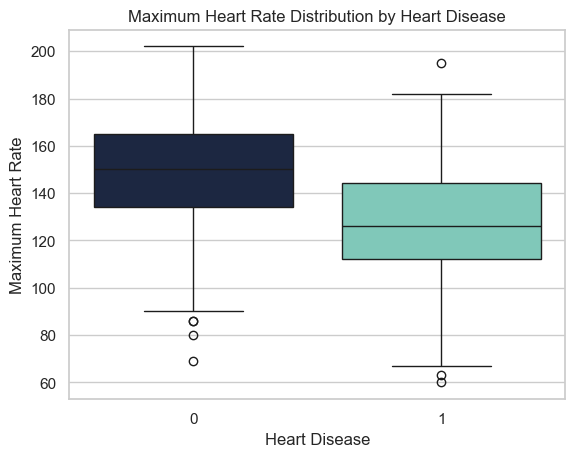

C:\Users\sukku\AppData\Local\Temp\ipykernel_65036\4156834431.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Oldpeak', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))


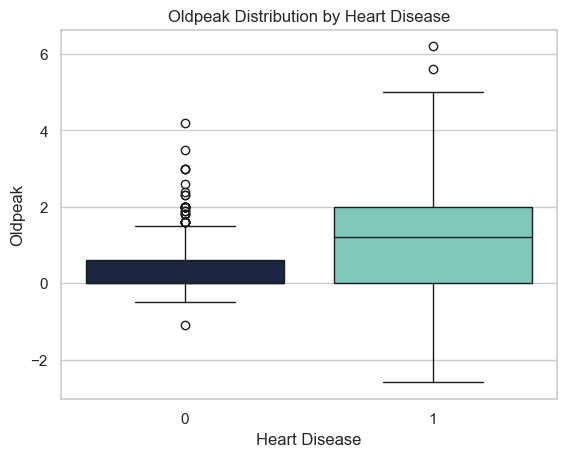

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the column names to verify
print(df.columns)

# Box plot 1: Age distribution based on Heart Disease
sns.boxplot(x='HeartDisease', y='Age', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

# Box plot 2: Cholesterol distribution based on Heart Disease
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Cholesterol Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

# Box plot 3: Resting Blood Pressure distribution based on Heart Disease
sns.boxplot(x='HeartDisease', y='RestingBP', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Resting Blood Pressure Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()

# Box plot 4: Maximum Heart Rate distribution based on Heart Disease
sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Maximum Heart Rate Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()

# Box plot 5: Oldpeak distribution based on Heart Disease
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Oldpeak Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Oldpeak')
plt.show()


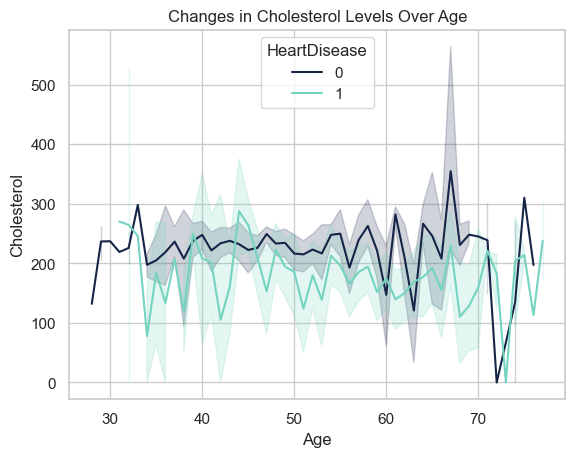

In [42]:
# Create a line graph for changes in cholesterol levels over time
sns.lineplot(x='Age', y='Cholesterol', data=df, hue='HeartDisease', palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Changes in Cholesterol Levels Over Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


C:\Users\sukku\AppData\Local\Temp\ipykernel_65036\3375291885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y='MaxHR', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))


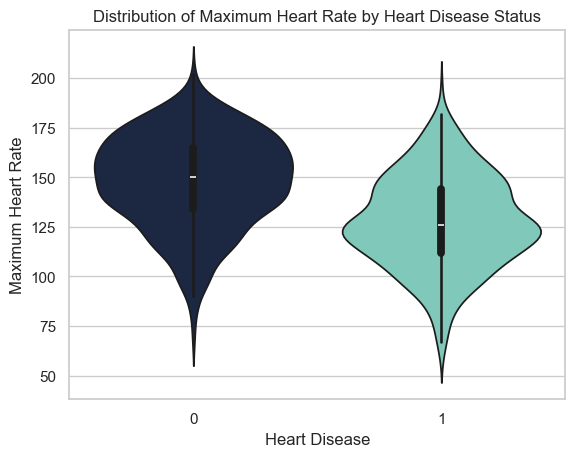

In [43]:
# Create a violin plot for the distribution of max heart rate across different heart disease statuses
sns.violinplot(x='HeartDisease', y='MaxHR', data=df, palette=sns.color_palette(['#162447', '#74d4c0']))
plt.title('Distribution of Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()


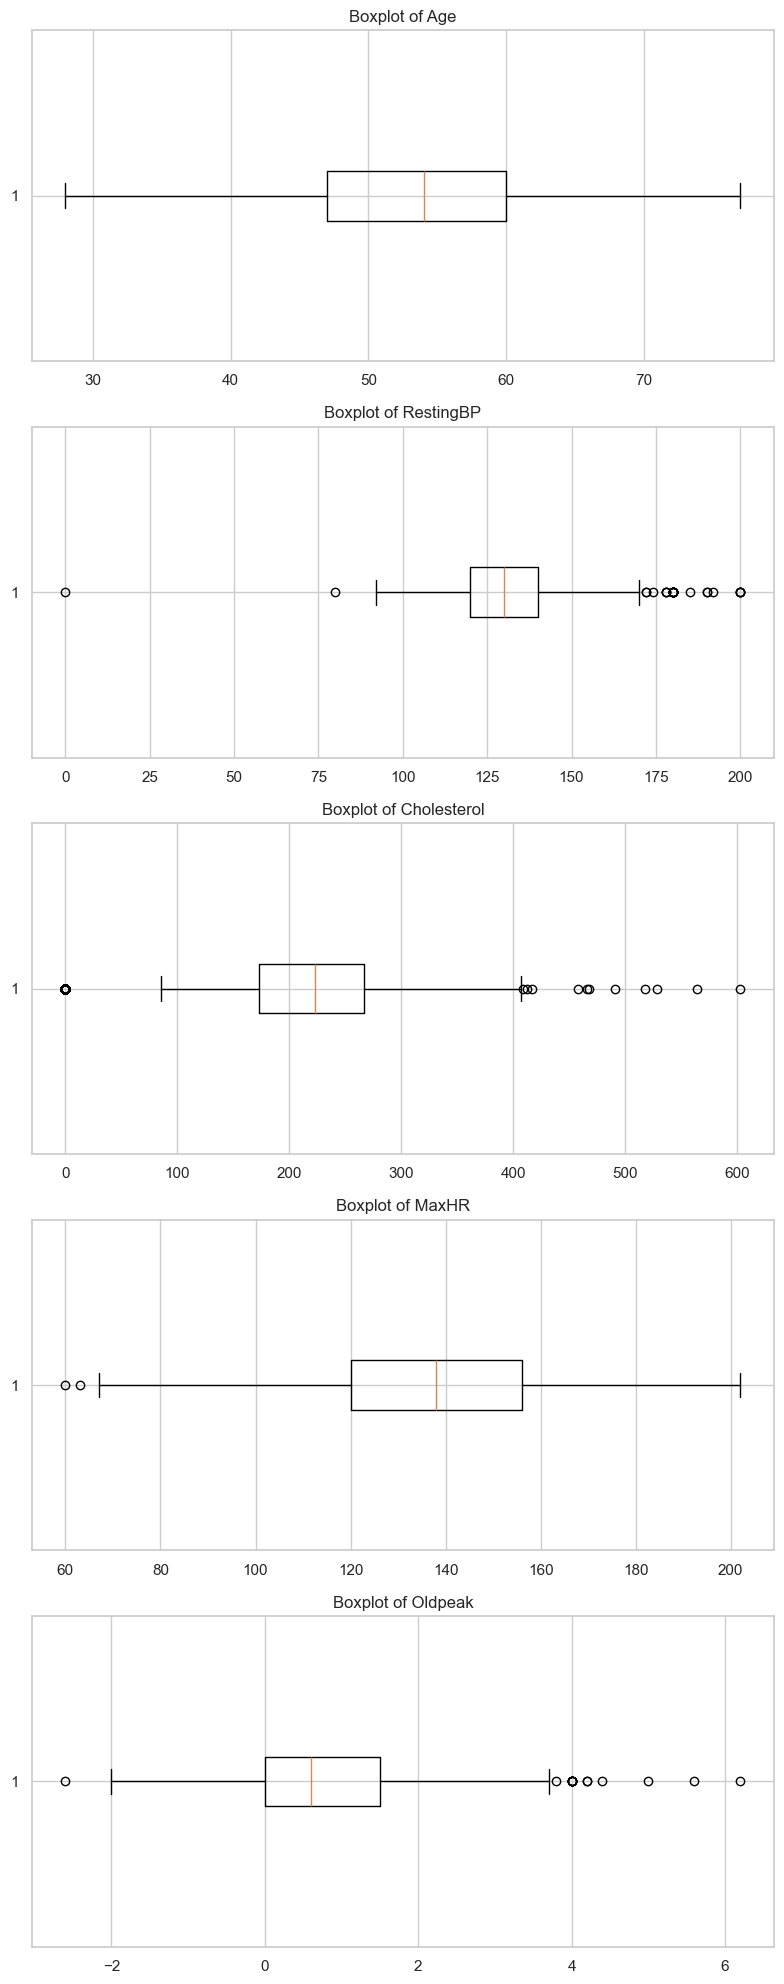

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# Load the dataset
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a figure with subplots for each numeric column
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, len(numeric_columns) * 4))

for i, col in enumerate(numeric_columns):
    # Plot boxplot for visual understanding of skewness
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


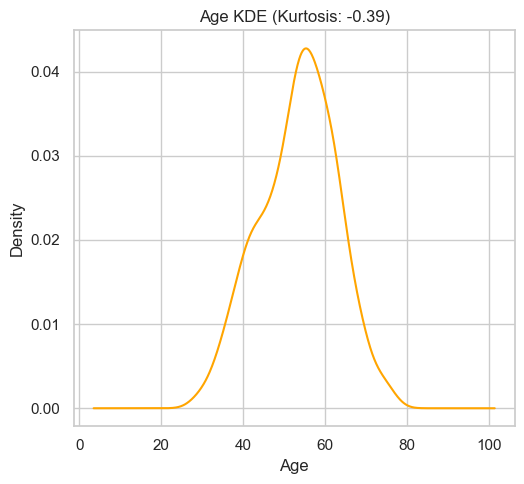

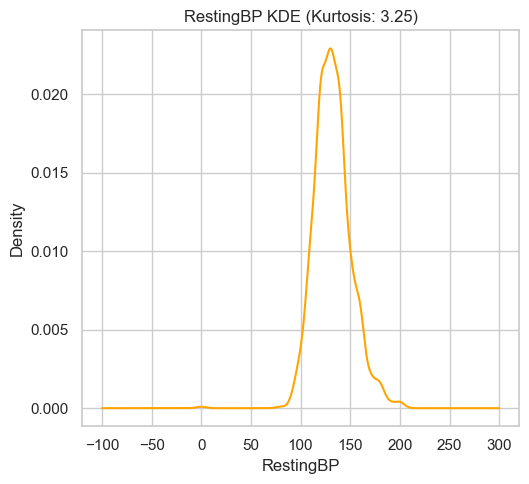

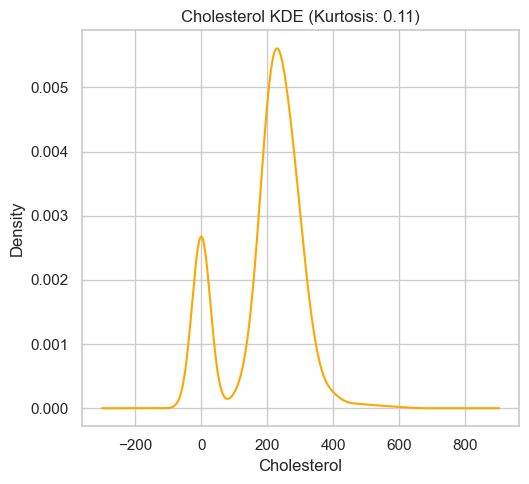

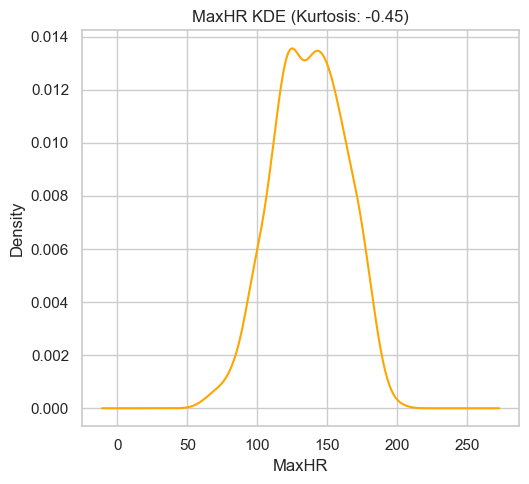

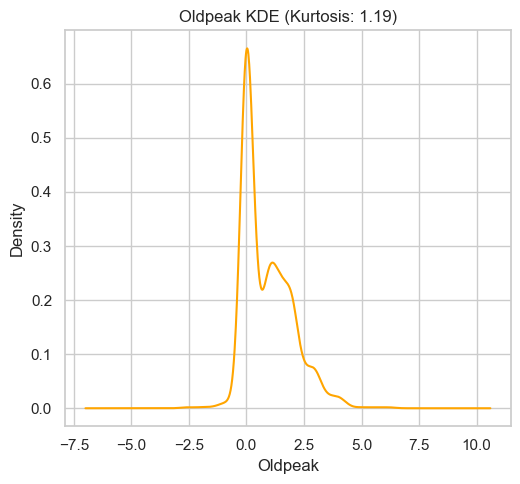

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Load the dataset
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Function to compute kurtosis and skewness
def compute_kurtosis_and_skewness(column):
    kurt = kurtosis(column, fisher=True)  # Fisher=True gives excess kurtosis
    skewness = skew(column)
    return kurt, skewness

# Compute kurtosis and skewness for each numeric column
kurtosis_skewness_results = {}
for col in numeric_columns:
    kurt, skewness = compute_kurtosis_and_skewness(df[col])
    kurtosis_skewness_results[col] = {'Kurtosis': kurt, 'Skewness': skewness}

# Visualize skewness and kurtosis
for col in numeric_columns:
    data = df[col].dropna()
    plt.figure(figsize=(10, 5))
   
    # Plot kernel density for kurtosis
    plt.subplot(1, 2, 2)
    data.plot.kde(color='orange')
    plt.title(f'{col} KDE (Kurtosis: {kurtosis_skewness_results[col]["Kurtosis"]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()


In [45]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')

# Use describe() to get a summary of the dataset
summary = df.describe()

# Display the summary
print(summary)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [69]:
import pandas as pd
import numpy as np

# Load the dataset from heart.csv
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Variance function
def compute_variance(column):
    return np.var(column, ddof=1)  # Sample variance

# Mean deviation function
def compute_mean_deviation(column):
    mean_value = np.mean(column)
    return np.mean(np.abs(column - mean_value))

# Quartile deviation and coefficient function
def compute_quartile_metrics(column):
    q1 = np.percentile(column, 25)  # First quartile (25th percentile)
    q3 = np.percentile(column, 75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile range
    quartile_deviation = iqr / 2
    quartile_coefficient = (iqr / (q3 + q1)) * 100 if (q3 + q1) != 0 else np.nan
    return quartile_deviation, quartile_coefficient

# Coefficient of standard deviation function
def compute_coefficient_of_standard_deviation(column):
    mean_value = np.mean(column)
    std_dev = np.std(column, ddof=1)  # Sample standard deviation
    return std_dev / mean_value if mean_value != 0 else np.nan  # Handle zero mean

# Coefficient of Variation function
def compute_coefficient_of_variation(column):
    mean_value = np.mean(column)
    std_dev = np.std(column, ddof=1)  # Sample standard deviation
    return (std_dev / mean_value) * 100 if mean_value != 0 else np.nan

# Range and coefficient of range function
def compute_range_metrics(column):
    max_val = np.max(column)
    min_val = np.min(column)
    range_val = max_val - min_val
    coeff_of_range = (range_val / (max_val + min_val)) if (max_val + min_val) != 0 else np.nan
    return range_val, coeff_of_range

# Compute metrics for each numeric column
results = {}
for col in numeric_columns:
    variance = compute_variance(df[col])
    mean_deviation = compute_mean_deviation(df[col])
    quartile_deviation, quartile_coefficient = compute_quartile_metrics(df[col])
    coefficient_of_std_dev = compute_coefficient_of_standard_deviation(df[col])
    coefficient_of_variation = compute_coefficient_of_variation(df[col])
    range_val, coeff_of_range = compute_range_metrics(df[col])
    results[col] = {
        'Variance': variance,
        'Mean Deviation': mean_deviation,
        'Quartile Deviation': quartile_deviation,
        'Quartile Coefficient (%)': quartile_coefficient,
        'Coefficient of Standard Deviation': coefficient_of_std_dev,
        'Coefficient of Variation (%)': coefficient_of_variation,
        'Range': range_val,
        'Coefficient of Range': coeff_of_range,
    }

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T
print(results_df)


                 Variance  Mean Deviation  Quartile Deviation  \
Age             88.974254        7.613454               6.500   
RestingBP      342.773903       14.104157              10.000   
Cholesterol  11964.891079       82.437609              46.875   
MaxHR          648.228614       20.985533              18.000   
Oldpeak          1.137572        0.877876               0.750   

             Quartile Coefficient (%)  Coefficient of Standard Deviation  \
Age                         12.149533                           0.176275   
RestingBP                    7.692308                           0.139839   
Cholesterol                 21.294719                           0.550223   
MaxHR                       13.043478                           0.186101   
Oldpeak                    100.000000                           1.201954   

             Coefficient of Variation (%)  Range  Coefficient of Range  
Age                             17.627470   49.0              0.466667  
Restin

In [116]:
import pandas as pd
from scipy.stats import kurtosis, skew

# Load the dataset
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Function to compute kurtosis and skewness
def compute_kurtosis_and_skewness(column):
    kurt = kurtosis(column, fisher=True)  # Fisher=True gives excess kurtosis
    skewness = skew(column)
    return kurt, skewness

# Compute kurtosis and skewness for each numeric column
kurtosis_skewness_results = {}
for col in numeric_columns:
    kurt, skewness = compute_kurtosis_and_skewness(df[col])
    kurtosis_skewness_results[col] = {'Kurtosis': kurt, 'Skewness': skewness}

# Convert results to a DataFrame for better readability
kurtosis_skewness_df = pd.DataFrame(kurtosis_skewness_results).T
print(kurtosis_skewness_df)


             Kurtosis  Skewness
Age         -0.390568 -0.195613
RestingBP    3.246932  0.179545
Cholesterol  0.111037 -0.609089
MaxHR       -0.452339 -0.144123
Oldpeak      1.189992  1.021200


In [118]:
import pandas as pd
from scipy.stats import kurtosis

# Load the dataset
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Compute kurtosis and classify
kurtosis_classification = []

for col in numeric_columns:
    kurt = kurtosis(df[col], fisher=True)
    if kurt == 0:
        classification = "Mesokurtic"
    elif kurt > 0:
        classification = "Leptokurtic"
    else:
        classification = "Platykurtic"
    
    kurtosis_classification.append({'Column': col, 'Kurtosis': kurt, 'Type': classification})

# Create a DataFrame for classification
kurtosis_df = pd.DataFrame(kurtosis_classification)

# Display results
print(kurtosis_df)


        Column  Kurtosis         Type
0          Age -0.390568  Platykurtic
1    RestingBP  3.246932  Leptokurtic
2  Cholesterol  0.111037  Leptokurtic
3        MaxHR -0.452339  Platykurtic
4      Oldpeak  1.189992  Leptokurtic


In [123]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Function to calculate moments
def calculate_moments(column):
    mean_value = np.mean(column)
    
    # Moment about the mean
    raw_moment = np.mean((column - mean_value)**2)  # 2nd raw moment
    raw_moment_3rd = np.mean((column - mean_value)**3)  # 3rd raw moment
    raw_moment_4th = np.mean((column - mean_value)**4)  # 4th raw moment
    
    # Moment about an arbitrary origin (e.g., 50th percentile)
    origin = np.percentile(column, 50)
    moment_about_origin = np.mean((column - origin)**2)
    
    # Moment about the origin
    central_moment = np.mean(column**2)
    
    return {
        'Moment_2': raw_moment,
        'Moment_3': raw_moment_3rd,
        'Moment_4': raw_moment_4th,
        'Moment_About_Origin': moment_about_origin,
        'Central_Moment': central_moment
    }

# Calculate moments for each numeric column
moments_results = {}
for col in numeric_columns:
    moments_results[col] = calculate_moments(df[col])

# Convert results to DataFrame for better readability
moments_df = pd.DataFrame(moments_results).T
moments_df


,Moment_2,Moment_3,Moment_4,Moment_About_Origin,Central_Moment
Age,88.877332,-163.901766,2.061237e+04,89.116558,2952.293028
RestingBP,342.400511,1137.563631,7.323785e+05,348.143791,17871.237473
Cholesterol,11951.857429,-795854.977459,4.444019e+08,12537.518519,51473.124183
MaxHR,647.522483,-2374.744376,1.068197e+06,648.940087,19364.325708
Oldpeak,1.136333,1.236998,5.410336e+00,1.218911,1.923747


In [126]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Function to calculate skewness
def calculate_skewness(column):
    mean_value = np.mean(column)
    n = len(column)
    
    # Calculate the third central moment
    third_moment = np.mean((column - mean_value)**3)
    
    # Calculate the variance
    variance = np.var(column, ddof=1)  # Sample variance
    
    # Skewness
    skewness = third_moment / (variance**(3/2))
    
    return skewness

# Calculate skewness for each numeric column
skewness_results = {}
for col in numeric_columns:
    skewness_results[col] = calculate_skewness(df[col])

# Convert results to DataFrame for better readability
skewness_df = pd.DataFrame(skewness_results, index=['Skewness'])
skewness_df


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Skewness,-0.195293,0.179252,-0.608094,-0.143888,1.019532


In [128]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Function to calculate third and fourth central moments
def central_moments(column):
    mean_value = np.mean(column)
    m2 = np.var(column, ddof=1)  # Sample variance
    m3 = np.mean((column - mean_value)**3)  # Third central moment
    m4 = np.mean((column - mean_value)**4)  # Fourth central moment
    return m2, m3, m4

# Function to calculate moment ratios
def calculate_moment_ratios(column):
    m2, m3, m4 = central_moments(column)
    beta1 = m3 / (m2**(3/2))  # Coefficient of skewness
    beta2 = m4 / (m2**2)  # Coefficient of kurtosis
    return beta1, beta2

# Calculate moment ratios for each numeric column
results = {}
for col in numeric_columns:
    beta1, beta2 = calculate_moment_ratios(df[col])
    results[col] = {'Skewness Coefficient (β1)': beta1, 'Kurtosis Coefficient (β2)': beta2}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T
results_df


,Skewness Coefficient (β1),Kurtosis Coefficient (β2)
Age,-0.195293,2.603750
RestingBP,0.179252,6.233330
Cholesterol,-0.608094,3.104263
MaxHR,-0.143888,2.542114
Oldpeak,1.019532,4.180869


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Define numeric columns for analysis
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Select a column to analyze (for example, 'Age')
selected_column = numeric_columns[0]  # Change this to select another column

# Display descriptive statistics
print(f'Descriptive Statistics for {selected_column}')


# Calculate and display moment ratios
m2 = np.var(df[selected_column], ddof=1)  # Sample variance
mean = df[selected_column].mean()
m3 = df[selected_column].skew()  # Sample skewness
m4 = df[selected_column].kurtosis()  # Sample kurtosis

beta1 = m3 / np.sqrt(m2)  # Coefficient of skewness
beta2 = m4  # Coefficient of kurtosis

print('Moment Ratios:')
print(f'Coefficient of Skewness (β1): {beta1}')
print(f'Coefficient of Kurtosis (β2): {beta2}')


Descriptive Statistics for Age
Moment Ratios:
Coefficient of Skewness (β1): -0.020771864151994012
Coefficient of Kurtosis (β2): -0.3861396123864571
